In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error ,mean_absolute_error,r2_score 

In [77]:
df=pd.read_csv("blackfriday.csv")

In [78]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [80]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [81]:
df = df.drop('Product_Category_3', axis=1)

In [82]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,365


In [83]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mean())

In [84]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Purchase                      0
dtype: int64

In [85]:
# Convert categorical columns to numerical
df["Gender"] = df["Gender"].map({"F": 0, "M": 1})
df["Age"] = df["Age"].map({"0-17": 0, "18-25": 1, "26-35": 2, "36-45": 3, "46-50": 4, "51-55": 5, "55+": 6})
df["City_Category"] = df["City_Category"].map({"A": 0, "B": 1, "C": 2})
df["Stay_In_Current_City_Years"] = df["Stay_In_Current_City_Years"].replace("4+", 4).astype(int)

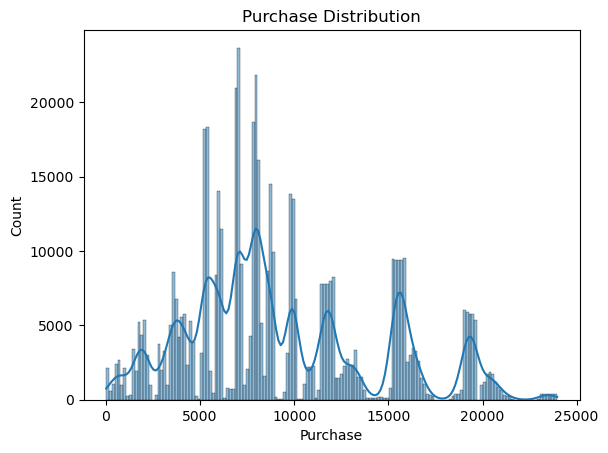

In [86]:
sns.histplot(df['Purchase'], kde=True)
plt.title('Purchase Distribution')
plt.show()

In [87]:
corr1=df.select_dtypes(include=[float,int])
corrmat=corr1.corr()
corrmat

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
User_ID,1.000000,-0.033474,0.032698,-0.023971,0.022859,-0.030737,0.020443,0.003825,0.001267,0.004716
Gender,-0.033474,1.000000,-0.004262,0.117291,-0.004515,0.014660,-0.011603,-0.045594,-0.015300,0.060346
Age,0.032698,-0.004262,1.000000,0.091463,0.123079,-0.004712,0.311738,0.061197,0.045185,0.015839
Occupation,-0.023971,0.117291,0.091463,1.000000,0.034479,0.030005,0.024280,-0.007618,-0.000317,0.020833
City_Category,0.022859,-0.004515,0.123079,0.034479,1.000000,0.019946,0.039790,-0.014364,-0.009777,0.061914
Stay_In_Current_City_Years,-0.030737,0.014660,-0.004712,0.030005,0.019946,1.000000,-0.012819,-0.004213,-0.001368,0.005422
Marital_Status,0.020443,-0.011603,0.311738,0.024280,0.039790,-0.012819,1.000000,0.019888,0.012507,-0.000463
Product_Category_1,0.003825,-0.045594,0.061197,-0.007618,-0.014364,-0.004213,0.019888,1.000000,0.373686,-0.343703
Product_Category_2,0.001267,-0.015300,0.045185,-0.000317,-0.009777,-0.001368,0.012507,0.373686,1.000000,-0.179309
Purchase,0.004716,0.060346,0.015839,0.020833,0.061914,0.005422,-0.000463,-0.343703,-0.179309,1.000000


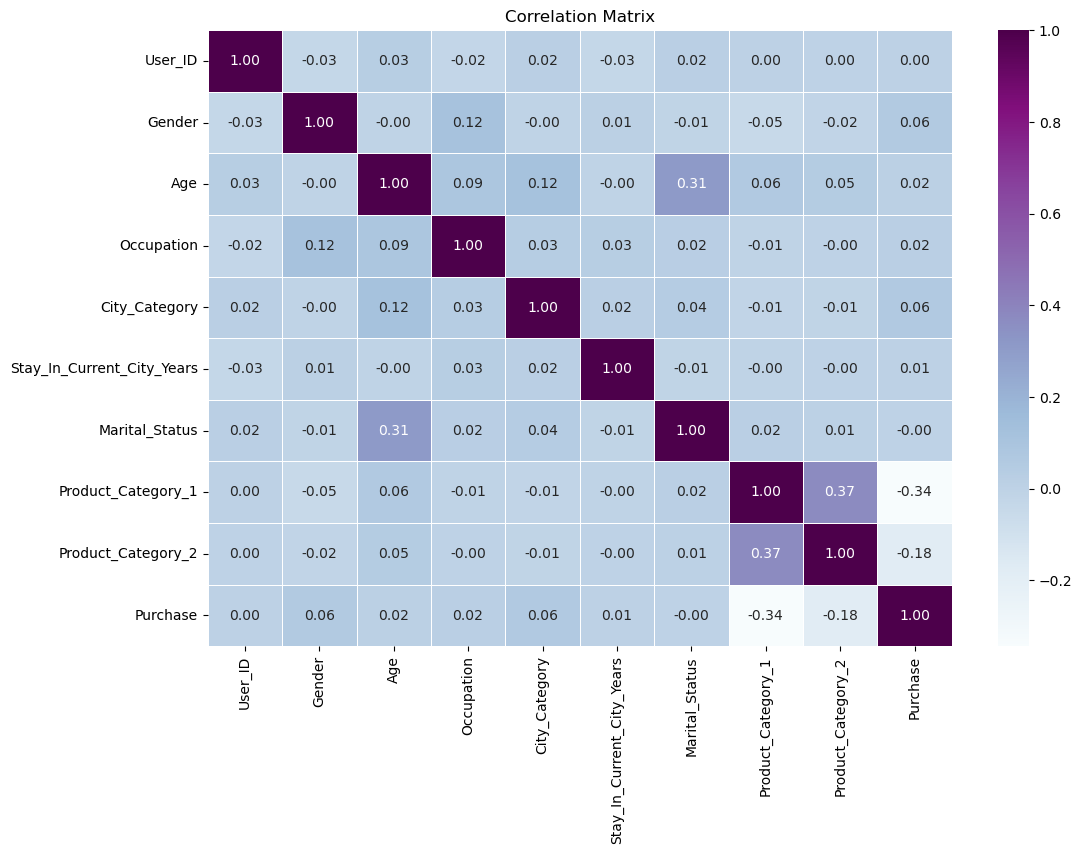

In [88]:
plt.figure(figsize=(12, 8))
sns.heatmap(corrmat, annot=True, cmap="BuPu", fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

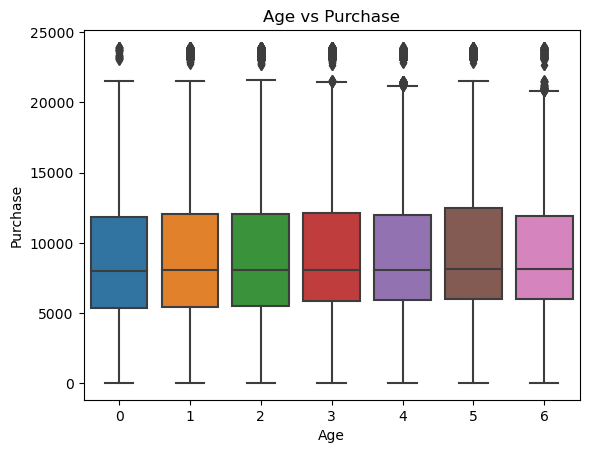

In [89]:
sns.boxplot(x='Age', y='Purchase', data=df)
plt.title('Age vs Purchase')
plt.show()

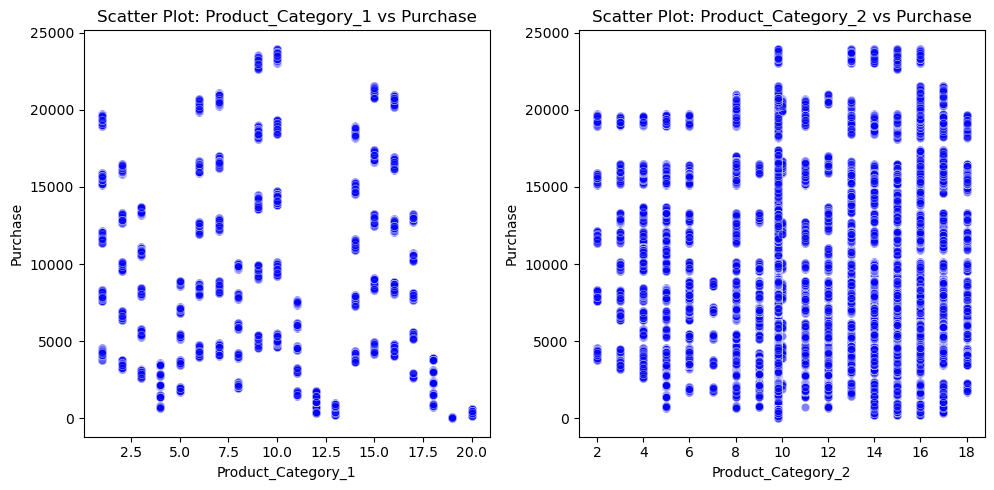

In [90]:
numeric_cols = ['Product_Category_1', 'Product_Category_2']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df[col], y=df['Purchase'], alpha=0.5, color='blue')
    plt.title(f"Scatter Plot: {col} vs Purchase")
    plt.xlabel(col)
    plt.ylabel("Purchase")
plt.tight_layout()
plt.show()

In [91]:
X = df.drop(columns=['Purchase'])
y = df['Purchase']

In [92]:
target = 'Purchase'

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:

df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,9.842329,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.000000,15200
2,1000001,P00087842,0,0,10,0,2,0,12,9.842329,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.000000,1057
4,1000002,P00285442,1,6,16,2,4,0,8,9.842329,7969


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  int32  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
dtypes: float64(1), int32(1), int64(8)
memory usage: 39.9 MB


In [73]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
print(f'R^2 score for Linear Regression: {r2_lr}')

ValueError: could not convert string to float: 'P00233842'